<a href="https://colab.research.google.com/github/apcalam/image_captioning/blob/main/Image_Captioning_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image captioning

## Load Relevant Libraries

In [ ]:
# Transformers installation
! pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [ ]:
! pip install transformers datasets evaluate -q
! pip install jiwer -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.9 MB/s eta 0:00:00


## Load the VizWiz Captions Dataset

Use the 🤗 Dataset library to load a dataset that consists of {image-caption} pairs.

In [ ]:
from datasets import load_dataset

ds = load_dataset("lmms-lab/VizWiz-Caps")
ds

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

(…)-00000-of-00008-047d962379c18a0e.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

(…)-00001-of-00008-45e41338559dd2c7.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

(…)-00002-of-00008-5cf73b4978ef71cc.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

(…)-00003-of-00008-1bd0a56ca56e8b93.parquet:   0%|          | 0.00/505M [00:00<?, ?B/s]

(…)-00004-of-00008-d586a610c1d83267.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

(…)-00005-of-00008-07186fbf6f0de9cb.parquet:   0%|          | 0.00/471M [00:00<?, ?B/s]

(…)-00006-of-00008-04f3b61469ea8a83.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

(…)-00007-of-00008-acada9b22261ed03.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

(…)-00000-of-00007-fa4aa740f2523bab.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

(…)-00001-of-00007-a1eef7feb43d369d.parquet:   0%|          | 0.00/548M [00:00<?, ?B/s]

(…)-00002-of-00007-51c2c861421b1198.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

(…)-00003-of-00007-566479c426988825.parquet:   0%|          | 0.00/544M [00:00<?, ?B/s]

(…)-00004-of-00007-abf6ffcd059405c5.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

(…)-00005-of-00007-8166361890843331.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

(…)-00006-of-00007-2a10af6f56df6206.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/8000 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/7750 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['image_id', 'image', 'caption', 'text_detected'],
        num_rows: 8000
    })
    val: Dataset({
        features: ['image_id', 'image', 'caption', 'text_detected'],
        num_rows: 7750
    })
})

```bash
DatasetDict({
    test: Dataset({
        features: ['image_id', 'image', 'caption', 'text_detected'],
        num_rows: 8000
    })
    val: Dataset({
        features: ['image_id', 'image', 'caption', 'text_detected'],
        num_rows: 7750
    })
})
```

The dataset has four features, `image_id`,  `image`, `caption`, and `text_detected`. There is one caption per image and "text_detected" indicates whether the image contains text for OCR tasks. We will just be captioning the images for this task and won't be performing OCR.


We will split the data into training, validation, and test sets and save the test set for evaluation in a separate notebook when the training is completed.

In [ ]:

from sklearn.model_selection import GroupShuffleSplit
import pandas as pd

def train_test_split_by_image_id(dataset, test_size=0.1, seed=42):
  # Create the train and test datasets
  splitter = GroupShuffleSplit(test_size=test_size, n_splits=1, random_state=seed)

  # Split the data while respecting image_id groups
  # Use dataset.data['image_id'] to get image_ids
  # and convert to a list or NumPy array
  df = dataset.to_pandas()
  train_inds, test_inds = next(splitter.split(df, groups=df['image_id']))

  # Create the train and test datasets
  training_ds = dataset.select(train_inds)
  test_ds = dataset.select(test_inds)

  return training_ds, test_ds

training_ds, test_ds = train_test_split_by_image_id(ds["val"])
print(training_ds)
test_ds



Dataset({
    features: ['image_id', 'image', 'caption', 'text_detected'],
    num_rows: 6975
})


Dataset({
    features: ['image_id', 'image', 'caption', 'text_detected'],
    num_rows: 775
})

In [ ]:
train_ds, val_ds = train_test_split_by_image_id(training_ds, test_size=0.3)

In [ ]:
len(train_ds), len(val_ds), len(test_ds)

(4882, 2093, 775)

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create the directory if it doesn't exist
os.makedirs("/content/drive/My Drive/image_caption", exist_ok=True)

# Save the test_ds dataset to a file in your Google Drive
test_ds.save_to_disk("/content/drive/My Drive/image_caption/test_ds")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving the dataset (0/1 shards):   0%|          | 0/775 [00:00<?, ? examples/s]

Let's visualize a couple of samples from the training set.

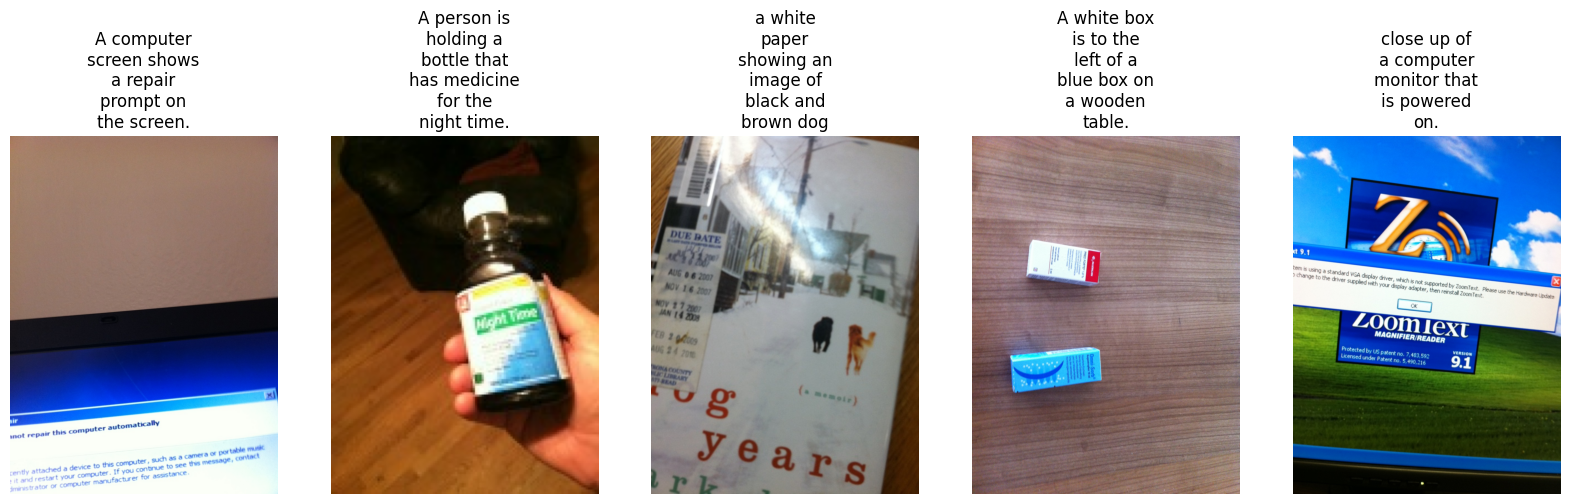

In [ ]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np


def plot_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)
        plt.imshow(images[i])
        plt.axis("off")


sample_images_to_visualize = [np.array(train_ds[i]["image"]) for i in range(5)]
sample_captions = [train_ds[i]["caption"] for i in range(5)]
plot_images(sample_images_to_visualize, sample_captions)

## Preprocess the dataset

Since the dataset has two modalities (image and text), the pre-processing pipeline will preprocess images and the captions.

To do so, load the processor class for BLIP.

In [ ]:
# Load model directly
from transformers import BlipProcessor
checkpoint = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(checkpoint)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


The processor will internally pre-process the image (which includes resizing, and pixel normalizing) and tokenize the caption with the BERT tokenizer.

In [ ]:
def transforms(example_batch):
    images = [x for x in example_batch["image"]]
    captions = [x for x in example_batch["caption"]]
    inputs = processor(images=images, text=captions, padding="max_length")
    inputs.update({"labels": inputs["input_ids"]})
    return inputs


train_ds.set_transform(transforms)
val_ds.set_transform(transforms)

With the dataset ready, you can now set up the model for fine-tuning.

## Load a base model

Load the ["Salesforce/blip-image-captioning-base"](https://huggingface.co/Salesforce/blip-image-captioning-base) into a [`BlipForConditionalGeneration`](https://huggingface.co/docs/transformers/en/model_doc/blip) object.

In [ ]:
from transformers import BlipForConditionalGeneration

model = BlipForConditionalGeneration.from_pretrained(checkpoint)

## Evaluate

Image captioning models are typically evaluated with the [Rouge Score](https://huggingface.co/spaces/evaluate-metric/rouge) or [Word Error Rate](https://huggingface.co/spaces/evaluate-metric/wer).

We use the 🤗 Evaluate library to do so.

In [ ]:
!pip install rouge_score

In [ ]:
from evaluate import load
import torch

rouge = load("rouge")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predicted = logits.argmax(-1)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
    decoded_predictions = processor.batch_decode(predicted, skip_special_tokens=True)
    rouge_score = rouge.compute(predictions=decoded_predictions, references=decoded_labels)
    return {"rouge_score": rouge_score}

## Train!

Now, you are ready to start fine-tuning the model. You will use the 🤗 [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) for this.

First, define the training arguments using [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments).

In [ ]:
!pip install bitsandbytes -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 827.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 446.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.4 MB/s eta 0:00:00


In [ ]:
from transformers import TrainingArguments, Trainer

model_name = checkpoint.split("/")[1]

training_args = TrainingArguments(
    output_dir=f"{model_name}-image-caption",
    learning_rate=5e-5,
    num_train_epochs=8,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=16,
    gradient_checkpointing=True,
    save_strategy="epoch",
    logging_steps=20,
    remove_unused_columns=False,
    optim="adamw_bnb_8bit",
    dataloader_pin_memory=True,
    dataloader_num_workers=2,
    torch_empty_cache_steps=4,
)

Then pass them along with the datasets and the model to 🤗 Trainer.

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,
)

To start training, simply call [train()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.train) on the [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) object.

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: a-calambur (a-calambur-myself) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
20,8.274000
40,5.470400
60,3.125900
80,1.129800
100,0.236400
120,0.087700
140,0.072500
160,0.062200
180,0.052300
200,0.052300


Step,Training Loss
20,8.274000
40,5.470400
60,3.125900
80,1.129800
100,0.236400
120,0.087700
140,0.072500
160,0.062200
180,0.052300
200,0.052300


TrainOutput(global_step=608, training_loss=0.6276152477673206, metrics={'train_runtime': 15515.2258, 'train_samples_per_second': 2.517, 'train_steps_per_second': 0.039, 'total_flos': 2.3124532879904735e+19, 'train_loss': 0.6276152477673206, 'epoch': 7.995904995904996})

Save model to local drive folder once training is done. Be sure to re-name the model or it will overwrite every model.

In [ ]:
import torch
from google.colab import drive

# Create the directory if it doesn't exist
drive.mount('/content/drive')

# # Ensure the directory exists
# import os
# os.makedirs("/content/drive/My Drive/image_caption", exist_ok=True)


# Save the model's state_dict
torch.save(trainer.model.state_dict(), "/content/drive/My Drive/image_caption/pytorch_model_fine_tune.bin")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainer.save_model("./image_caption")